#  Scotogenic Singlet Dark Matter

(Re)compile everything

In [ ]:
%%bash
cd ..
./compile_spheno_directly.sh DMLR > /dev/null 
cd micromegas
make >/dev/null 2>/dev/null && make >/dev/null 2>/dev/null
cd DMLR
make main=CalcOmega.cpp >/dev/null

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *


## Check point with IDM official

M23: DM mass
vR: ZR mass


In [8]:
a=hep(MODEL='DMLR')
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)

In [9]:
a.LHA.blocks

OrderedDict([('MODSEL',
              MODSEL { 1 : 1              #  1/0: High/low scale input ; 2 : 1              # Boundary Condition  ; 6 : 1              # Generation Mixing  }),
             ('SMINPUTS',
              SMINPUTS { 2 : 1.166370E-05   # G_F,Fermi constant ; 3 : 1.187000E-01   # alpha_s(MZ) SM MSbar ; 4 : 9.118870E+01   # Z-boson pole mass ; 5 : 4.180000E+00   # m_b(mb) SM MSbar ; 6 : 1.735000E+02   # m_top(pole) ; 7 : 1.776690E+00   # m_tau(pole)  }),
             ('MINPAR',
              MINPAR { 1 : 4.0000000E+03  # vRinput; 2 : 1.0000000E+01  # TanBeta; 3 : 1.0000000E-01  # lam1INPUT; 4 : 0.000000E+00   # lam2INPUT; 5 : 3.0000000E-01  # lam3INPUT; 6 : -1.5000000E-01 # lam4INPUT; 7 : 2.0000000E-04  # rho1INPUT; 8 : 5.0000000E-03  # rho2INPUT; 9 : 0.000000E+00   # alp1INPUT; 10 : 0.000000E+00   # alp2INPUT; 11 : -5.0000000E-03 # alp3INPUT; 13 : 1.0000000E+03  # M23INPUT }),
             ('SPHENOINPUT',
              SPHENOINPUT { 1 : -1             # error level ; 2

Check `a.config` for proper configurations.

In [6]:
#h,U,Mnuin,phases=a.to_yukawas() #test Mnuin/0.9628#/0.968
spc=a.runSPheno()
mo=commands.getoutput("../micromegas/DMLR/CalcOmega LesHouches.in.Scotogenic | grep -A10 'Omega h^2'")
print "====micrOMEGAS SARAH: ======"
print mo

====micrOMEGAS SARAH: ======
Xf=3.26e+01 Omega h^2=1.82e-03

# Channels which contribute to 1/(omega) more than 1%.
# Relative contributions in % are displayed
   11% ~cp ~Cpp ->d1 U1 
   11% ~cp ~Cpp ->d2 U2 
   11% ~cp ~Cpp ->d3 U3 
    6% ~cp ~c01 ->D1 u1 
    6% ~cp ~c02 ->D1 u1 
    6% ~cp ~c01 ->D2 u2 
    6% ~cp ~c02 ->D2 u2 


In [7]:
def xtoipt(x,lha,param={'block_name':'MNIN','block_key':(1,1)}):
    '''obtain LHA output from varible input'''
    block=param['block_name'];bkey=param['block_key']
    comment=lha.blocks[block][bkey].split('#')
    if len(comment)>1:
        comment=comment[1]
        lha.blocks[block][bkey]='%0.8E       # %s' %(x,comment)
        
    return lha

In [8]:
a=hep(MODEL='DMLR')
for bl in ['YDRIN','YL1IN','YL1IN']:
    for key in [(1,1),(2,2),(3,3)]:
        a.LHA.blocks[bl][key]='%.8E       # %s%s' %(0,bl.replace('IN',''),key)

In [10]:
df=a.run_micromegas(xtoipt,param={'block_name':'MINPAR','block_key':13},var_min=100,var_max=20000,npoints=200,CI=False)

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


In [24]:
df.Omega_h2[:1]

0    0.00375
Name: Omega_h2, dtype: float64

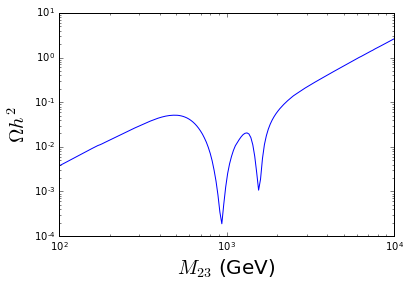

In [12]:
plt.loglog(df.M23INPUT,df.Omega_h2)
plt.xlabel('$M_{23}$ (GeV)',size=20)
plt.ylabel('$\Omega h^2$',size=20)
plt.xlim(100,10000)
plt.ylim(1E-4,10)
plt.savefig('out.png')

In [1]:
from hep import *

In [2]:
b=pyslha.init_LHA('MASS')
sm=range(1,7)+range(11,17,2)+[23,24]
if not hasattr(a,'LHA_out'):
    spc=a.runSPheno()
for k in a.LHA_out.blocks['MASS'].entries.keys():
    if k not in sm:
        if a.pdg.pdgid_names.has_key(k):
            b.blocks['MASS'].entries[k]='%.8E    # %s' %(a.LHA_out.blocks['MASS'].entries[k],a.pdg.pdgid_names[k] )   
        else:
            b.blocks['MASS'].entries[k]='%.8E    # prt_%d' %(a.LHA_out.blocks['MASS'].entries[k],k)   #

NameError: name 'a' is not defined

In [3]:
b=pyslha.init_LHA('MASS')
b.blocks['Hola']=pyslha.init_LHA('Hola')

In [15]:
pyslha.init_LHA


In [16]:
blocks

['A']

In [6]:

b.blocks['MASS']

MASS { 25 : 5.89569252E+01    # H0; 35 : 1.18606587E+02    # Higgs_prime0; 335 : 2.92176682E+02    # f_prime_2; 36 : 2.77817966E+02    # A0; 37 : 2.02193870E+02    # Higgs_plus; 9000055 : 4.00185657E+02    # prt_9000055; 32 : 3.14309761E+03    # Z_prime0; 34 : 1.87668736E+03    # W_prime_plus; 12 : -1.27640984E-10    # NUE; 14 : -1.27640984E-10    # NUM; 16 : -1.27640984E-10    # NUT; 6000012 : -1.27640984E-10    # prt_6000012; 6000014 : -1.27640984E-10    # prt_6000014; 6000016 : -1.27640984E-10    # prt_6000016; 6000055 : 1.00000000E+03    # prt_6000055; 17 : 1.00000000E+03    # L_minus; 9000012 : -1.00000000E+03    # prt_9000012; 9000014 : 1.00000000E+03    # prt_9000014 }

In [34]:
cat SPheno.spc.DMLR | grep -A40 -i 'block mass'

Block MASS  # Mass spectrum
#   PDG code      mass          particle
        25     5.89569252E+01  # hh_1
        35     1.18606587E+02  # hh_2
       335     2.92176682E+02  # hh_3
        36     2.77817966E+02  # Ah_3
        37     2.02193870E+02  # Hpm_3
   9000055     4.00185657E+02  # deltaRpp
        23     9.11887000E+01  # VZ
        32     3.14309761E+03  # VZR
        24     8.03497269E+01  # VWLm
        34     1.87668736E+03  # VWRm
         1     5.00000000E-03  # Fd_1
         3     9.50000000E-02  # Fd_2
         5     4.18000000E+00  # Fd_3
         2     2.50000000E-03  # Fu_1
         4     1.27000000E+00  # Fu_2
         6     1.73500000E+02  # Fu_3
        11     5.10998930E-04  # Fe_1
        13     1.05658372E-01  # Fe_2
        15     1.77669000E+00  # Fe_3
        12    -1.27640984E-10  # Fv_1
        14    -1.27640984E-10  # Fv_2
        16    -1.27640984E-10  # Fv_3
   6000012    -1.27640984E-10  # Fv_4
   6000014    -1.27640984E-10  # Fv_5
   6000016    -1.

In [36]:
1+1

2

In [11]:
spc=a.runSPheno()
mo=commands.getoutput("../micromegas/DMLR/CalcOmega_with_DDetection")
print "====micrOMEGAS SARAH: ======"
print mo

====micrOMEGAS SARAH: ======
PROCESS: ~cp,~cp->AllEven,1*x{Hmm,Hpp,hh1,hh2,hh3,Ah3,Hm3,Hp3,g,A,Z,Zp,WLm,WLp,WRm,WRp,d1,D1,d2,D2,d3,D3,u1,U1,u2,U2,u3,U3,e1,E1,e2,E2,e3,E3,nu1,nu2,nu3,nu4,nu5,nu6
PROCESS: ~cp,~Cp->AllEven,1*x{Hmm,Hpp,hh1,hh2,hh3,Ah3,Hm3,Hp3,g,A,Z,Zp,WLm,WLp,WRm,WRp,d1,D1,d2,D2,d3,D3,u1,U1,u2,U2,u3,U3,e1,E1,e2,E2,e3,E3,nu1,nu2,nu3,nu4,nu5,nu6
PROCESS: ~cp,~cpp->AllEven,1*x{Hmm,Hpp,hh1,hh2,hh3,Ah3,Hm3,Hp3,g,A,Z,Zp,WLm,WLp,WRm,WRp,d1,D1,d2,D2,d3,D3,u1,U1,u2,U2,u3,U3,e1,E1,e2,E2,e3,E3,nu1,nu2,nu3,nu4,nu5,nu6
Processes of this type are absent
PROCESS: ~cp,~Cpp->AllEven,1*x{Hmm,Hpp,hh1,hh2,hh3,Ah3,Hm3,Hp3,g,A,Z,Zp,WLm,WLp,WRm,WRp,d1,D1,d2,D2,d3,D3,u1,U1,u2,U2,u3,U3,e1,E1,e2,E2,e3,E3,nu1,nu2,nu3,nu4,nu5,nu6
PROCESS: ~cp,~c01->AllEven,1*x{Hmm,Hpp,hh1,hh2,hh3,Ah3,Hm3,Hp3,g,A,Z,Zp,WLm,WLp,WRm,WRp,d1,D1,d2,D2,d3,D3,u1,U1,u2,U2,u3,U3,e1,E1,e2,E2,e3,E3,nu1,nu2,nu3,nu4,nu5,nu6
PROCESS: ~cp,~c02->AllEven,1*x{Hmm,Hpp,hh1,hh2,hh3,Ah3,Hm3,Hp3,g,A,Z,Zp,WLm,WLp,WRm,WRp,d1,D1,d2,D2,d3,D3,u1,

In [13]:
a.LHA.blocks

OrderedDict([('MODSEL',
              MODSEL { 1 : 1              #  1/0: High/low scale input ; 2 : 1              # Boundary Condition  ; 6 : 1              # Generation Mixing  }),
             ('SMINPUTS',
              SMINPUTS { 2 : 1.166370E-05   # G_F,Fermi constant ; 3 : 1.187000E-01   # alpha_s(MZ) SM MSbar ; 4 : 9.118870E+01   # Z-boson pole mass ; 5 : 4.180000E+00   # m_b(mb) SM MSbar ; 6 : 1.735000E+02   # m_top(pole) ; 7 : 1.776690E+00   # m_tau(pole)  }),
             ('MINPAR',
              MINPAR { 1 : 4.0000000E+03  # vRinput; 2 : 1.0000000E+01  # TanBeta; 3 : 1.0000000E-01  # lam1INPUT; 4 : 0.000000E+00   # lam2INPUT; 5 : 3.0000000E-01  # lam3INPUT; 6 : -1.5000000E-01 # lam4INPUT; 7 : 2.0000000E-04  # rho1INPUT; 8 : 5.0000000E-03  # rho2INPUT; 9 : 0.000000E+00   # alp1INPUT; 10 : 0.000000E+00   # alp2INPUT; 11 : -5.0000000E-03 # alp3INPUT; 13 : 1.0000000E+03  # M23INPUT }),
             ('SPHENOINPUT',
              SPHENOINPUT { 1 : -1             # error level ; 2

In [29]:
a.LHA.blocks['MINPAR'][1]='4.0000000E+03  # vRinput. controls ZR'
a.LHA.blocks['MINPAR'][2]='1.0000000E+03  # M23INPUT. controls DM mass'
spc=a.runSPheno()
mo=commands.getoutput("../micromegas/DMLR/CalcOmega_with_DDetection")
print "====micrOMEGAS SARAH: ======"
print mo

====micrOMEGAS SARAH: ======

Masses of odd sector Particles:
~cp  : Mcp   =  1000.0 || ~cpp : Mcpp  =  1000.0 || ~c01 : Mc01  =  1000.0 
~c02 : Mc02  =  1000.0 || 
Xf=3.27e+01 Omega h^2=1.82e-03

# Channels which contribute to 1/(omega) more than 1%.
# Relative contributions in % are displayed
   11% ~cp ~Cpp ->d1 U1 
   11% ~cp ~Cpp ->d2 U2 
   11% ~cp ~Cpp ->d3 U3 
    6% ~cp ~c01 ->D1 u1 
    6% ~cp ~c02 ->D1 u1 
    6% ~cp ~c01 ->D2 u2 
    6% ~cp ~c02 ->D2 u2 
    5% ~cp ~c01 ->D3 u3 
    5% ~cp ~c02 ->D3 u3 
    4% ~cp ~Cpp ->E1 nu4 
    4% ~cp ~Cpp ->E2 nu5 
    4% ~cp ~Cpp ->E3 nu6 
    2% ~cp ~c01 ->e1 nu4 
    2% ~cp ~c02 ->e1 nu4 
    2% ~cp ~c01 ->e2 nu5 
    2% ~cp ~c02 ->e2 nu5 
    2% ~cp ~c01 ->e3 nu6 
    2% ~cp ~c02 ->e3 nu6 
    1% ~cp ~Cpp ->hh1 WRm 

==== Calculation of CDM-nucleons amplitudes  =====
         TREE LEVEL
CDM-nucleon micrOMEGAs amplitudes:
proton:  SI  1.514E-07  SD  -1.271E-31
neutron: SI  -1.858E-06  SD  3.484E-32
         BOX DIAGRAMS
CDM-nucleon

In [18]:
spc.blocks['MASS']

MASS { 25 :  130; 35 :  802; 335 :  2.03e+03; 36 :  2.03e+03; 37 :  2.02e+03; 9000055 :  4e+03; 23 :  91.2; 32 :  3.14e+04; 24 :  80.3; 34 :  1.87e+04; 1 :  0.005; 3 :  0.095; 5 :  4.18; 2 :  0.0025; 4 :  1.27; 6 :  174; 11 :  0.000511; 13 :  0.106; 15 :  1.78; 12 : -2.21e-12; 14 : -2.21e-12; 16 : -2.21e-12; 6000012 : -2.21e-12; 6000014 : -2.21e-12; 6000016 : -2.21e-12; 6000055 :  1e+03; 17 :  1e+03; 9000012 : -1e+03; 9000014 :  1e+03 }

In [25]:
cat SPheno.spc.DMLR | grep -i -A30 'block mass'

Block MASS  # Mass spectrum
#   PDG code      mass          particle
        25     9.09743320E+01  # hh_1
        35     8.02395548E+02  # hh_2
       335     2.00909568E+03  # hh_3
        36     2.00907510E+03  # Ah_3
        37     2.00002095E+03  # Hpm_3
   9000055     4.00001895E+03  # deltaRpp
        23     9.11887000E+01  # VZ
        32     3.14235008E+04  # VZR
        24     8.03497269E+01  # VWLm
        34     1.87492980E+04  # VWRm
         1     5.00000000E-03  # Fd_1
         3     9.50000000E-02  # Fd_2
         5     4.18000000E+00  # Fd_3
         2     2.50000000E-03  # Fu_1
         4     1.27000000E+00  # Fu_2
         6     1.73500000E+02  # Fu_3
        11     5.10998930E-04  # Fe_1
        13     1.05658372E-01  # Fe_2
        15     1.77669000E+00  # Fe_3
        12    -2.21844275E-14  # Fv_1
        14    -2.21844275E-14  # Fv_2
        16    -2.21844275E-14  # Fv_3
   6000012    -2.21844275E-14  # Fv_4
   6000014    -2.21844275E-14  # Fv_5
   6000016    -2.

In [26]:
mo=commands.getoutput("../micromegas/DMLR/CalcOmega")

In [28]:
print mo


Masses of odd sector Particles:
~cp  : Mcp   =  1000.0 || ~cpp : Mcpp  =  1000.0 || ~c01 : Mc01  =  1000.0 
~c02 : Mc02  =  1000.0 || 
Xf=2.71e+01 Omega h^2=3.05e-01

# Channels which contribute to 1/(omega) more than 1%.
# Relative contributions in % are displayed
   23% ~cpp ~Cpp ->A A 
   14% ~cpp ~Cpp ->A Z 
    6% ~cpp ~Cpp ->u1 U1 
    6% ~cpp ~Cpp ->u2 U2 
    6% ~cpp ~Cpp ->u3 U3 
    6% ~cpp ~Cpp ->e1 E1 
    6% ~cpp ~Cpp ->e2 E2 
    6% ~cpp ~Cpp ->e3 E3 
    2% ~cpp ~Cpp ->Z Z 
    2% ~cpp ~Cpp ->d1 D1 
    2% ~cpp ~Cpp ->d2 D2 
    2% ~cpp ~Cpp ->d3 D3 
    2% ~cp ~Cp ->u1 U1 
    2% ~cp ~Cp ->u2 U2 
    2% ~cp ~Cp ->u3 U3 
    1% ~cp ~Cp ->A A 
    1% ~cp ~Cp ->e1 E1 
    1% ~cp ~Cp ->e2 E2 
    1% ~cp ~Cp ->e3 E3 
    1% ~cpp ~Cpp ->nu1 nu1 
    1% ~cpp ~Cpp ->nu2 nu2 
    1% ~cpp ~Cpp ->nu3 nu3 
